In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import time
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA

In [2]:
from preprocess import EstateData

dataset = EstateData("final.csv")

In [3]:
dataset.split_data()

In [4]:
dataset.preprocess(tukey=True)

(31567, 13)


In [5]:
train = dataset.train
test = dataset.test

In [6]:
print("train size {}".format(train.shape))
print("test size {}".format(test.shape))

train size (31567, 13)
test size (9308, 13)


In [7]:
test["PricePerM2"]

23451     40.259740
21413     16.666667
35209    925.000000
8181     112.068966
8498      69.000000
            ...    
21234    206.896552
22869    121.666667
13368     36.842105
33989    918.367347
11156    154.285714
Name: PricePerM2, Length: 9308, dtype: float64

In [8]:
train.head()

,House Direction,Balcony Direction,Toilets,Bedrooms,Legits,Floors,Facade,Entrance,Area,X,Y,Price,PricePerM2
12370,None,None,None,None,+đỏ+hồng,None,-0.425798,0.000000,-0.956980,0.745767,0.967952,4300.0,122.857143
31494,None,None,None,4,+đỏ+hồng,2,-0.400751,0.000000,0.679464,-0.456448,0.340097,20000.0,243.902439
5780,None,None,2,2,None,2,-0.400751,-4.397887,-0.782891,-3.062386,0.158826,1400.0,35.000000
35664,None,None,None,4,+đỏ+hồng,4,2.354412,0.000000,-0.504347,-0.994430,-0.719763,108000.0,2250.000000
5828,None,đông nam,2,2,+đỏ+hồng,None,0.599249,0.000000,-0.260621,-0.201492,-1.479700,2100.0,38.181818


In [9]:
train["PricePerM2"].describe()

count    31567.000000
mean       575.331537
std        702.380200
min         10.000000
25%         75.000000
50%        178.571429
75%       1018.350168
max       4833.333333
Name: PricePerM2, dtype: float64

In [10]:
train, dev = train_test_split(train, test_size = 0.1)

In [11]:
features = train.columns.tolist()
features.remove("Price")
features.remove("PricePerM2")

In [12]:
xgb = XGBRegressor(n_estimators = 300, max_depth=20, eta=0.01, gamma=1, tree_method="gpu_hist", subsample=1, objective="reg:squarederror", enable_categorical=True)

In [13]:
xgb.fit(train[features], train["PricePerM2"], eval_set=[(dev[features], dev["PricePerM2"])], eval_metric="mape", early_stopping_rounds=20)

C:\Users\vietdata\anaconda3\envs\ML_env\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\vietdata\anaconda3\envs\ML_env\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mape:0.98235
[1]	validation_0-mape:0.97115
[2]	validation_0-mape:0.96023
[3]	validation_0-mape:0.94945
[4]	validation_0-mape:0.93881
[5]	validation_0-mape:0.92830
[6]	validation_0-mape:0.91801
[7]	validation_0-mape:0.90791
[8]	validation_0-mape:0.89800
[9]	validation_0-mape:0.88836
[10]	validation_0-mape:0.87902
[11]	validation_0-mape:0.86996
[12]	validation_0-mape:0.86093
[13]	validation_0-mape:0.85207
[14]	validation_0-mape:0.84338
[15]	validation_0-mape:0.83475
[16]	validation_0-mape:0.82642
[17]	validation_0-mape:0.81823
[18]	validation_0-mape:0.81019
[19]	validation_0-mape:0.80240
[20]	validation_0-mape:0.79486
[21]	validation_0-mape:0.78755
[22]	validation_0-mape:0.78024
[23]	validation_0-mape:0.77307
[24]	validation_0-mape:0.76604
[25]	validation_0-mape:0.75916
[26]	validation_0-mape:0.75253
[27]	validation_0-mape:0.74598
[28]	validation_0-mape:0.73970
[29]	validation_0-mape:0.73356
[30]	validation_0-mape:0.72766
[31]	validation_0-mape:0.72177
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=True, eta=0.01, eval_metric=None,
             feature_types=None, gamma=1, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

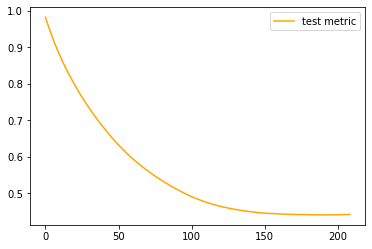

In [14]:
results = xgb.evals_result()
#plt.plot(results["validation_0"]["mape"], c= "b", label="train metric")
plt.plot(results["validation_0"]["mape"], c= "orange", label="test metric")
plt.legend()

In [15]:
pred = xgb.predict(test[features])
print(mape(test["PricePerM2"], pred))

0.4495373008252382


(array([5522.,  528., 1560.,  934.,  623.,  311.,   47.,   31.,    6.,
          10.]),
 array([ 0.49778572,  4.5124736 ,  8.527162  , 12.541849  , 16.556538  ,
        20.571226  , 24.585913  , 28.600601  , 32.615288  , 36.62998   ,
        40.644665  ], dtype=float32),
 <BarContainer object of 10 artists>)

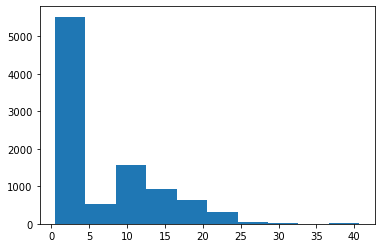

In [34]:
plt.hist(pred)

In [17]:
test["PricePerM2"].describe()

count     9557.000000
mean       893.671987
std       1272.235083
min          0.024000
25%         86.842105
50%        240.000000
75%       1300.000000
max      10000.000000
Name: PricePerM2, dtype: float64

In [20]:
pred = xgb.predict(test[features])
print(r2_score(test["PricePerM2"], pred))


-0.0019258128781889372


(array([9.492e+03, 8.000e+01, 1.900e+01, 5.000e+00, 3.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-2.73714905e+01,  1.25797259e+06,  2.51597256e+06,  3.77397252e+06,
         5.03197249e+06,  6.28997245e+06,  7.54797242e+06,  8.80597238e+06,
         1.00639723e+07,  1.13219723e+07,  1.25799723e+07,  1.38379722e+07,
         1.50959722e+07,  1.63539722e+07,  1.76119721e+07,  1.88699721e+07,
         2.01279721e+07,  2.13859720e+07,  2.26439720e+07,  2.39019720e+07,
         2.51599719e+07]),
 <BarContainer object of 20 artists>)

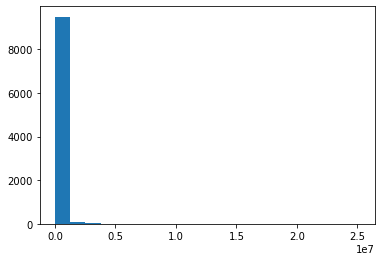

In [31]:
plt.hist(test["Price"].values-pred, bins=20)

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random', perplexity=3).fit_transform(pd.get_dummies(train[features]).values)

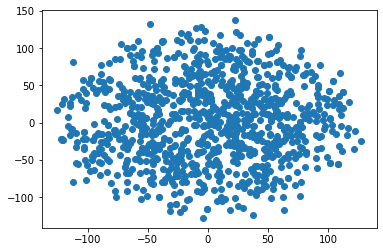

In [40]:
a, b = list(zip(*X_embedded))
plt.scatter(a[:1000],b[:1000])

(array([ 6088., 11138.,  5496.,  3396.,  1929.,  1215.,   697.,   575.,
          341.,   219.]),
 array([ 20.5 ,  38.35,  56.2 ,  74.05,  91.9 , 109.75, 127.6 , 145.45,
        163.3 , 181.15, 199.  ]),
 <BarContainer object of 10 artists>)

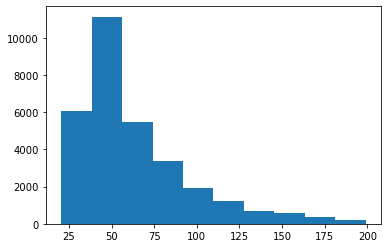

In [362]:
plt.hist(data["Area"][(data["Area"] > 20) & (data["Area"] <200)], bins=10)

In [363]:
data["Area"][(data["Area"] > 20) & (data["Area"] <200)]

0        80.0
1        78.0
2        48.0
3        43.0
4        35.0
         ... 
34951    54.0
34952    75.0
34953    40.0
34954    42.0
34955    50.0
Name: Area, Length: 31094, dtype: float64

<AxesSubplot:ylabel='Frequency'>

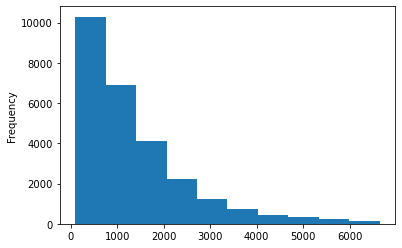

In [492]:
data["Price"].plot(kind="hist")

In [391]:
data[data["Price"] > 300000]

,House Direction,Balcony Direction,Bedrooms,Toilets,Legits,Floors,Facade,Entrance,District,Area,Price
13890,None,None,6,None,+đỏ+hồng,3,17.0,3.0,nam từ liêm,180.0,330000.0
13908,None,None,4,None,+đỏ+hồng,4,5.0,3.0,hoàn kiếm,130.0,330000.0
13931,None,None,10+,None,+đỏ+hồng,9,5.0,3.0,ba đình,89.0,320000.0
14000,None,None,8,None,None,8,5.0,3.0,đống đa,90.0,330000.0
14042,None,None,5,None,+đỏ+hồng,7,7.0,3.0,cầu giấy,120.0,324000.0
...,...,...,...,...,...,...,...,...,...,...,...
34836,None,None,5,None,+đỏ+hồng,5,30.0,3.0,cầu giấy,56.0,310000.0
34842,None,None,3,None,+đỏ+hồng,5,2.0,3.0,long biên,35.0,310000.0
34904,None,None,10+,None,+đỏ+hồng,8,8.0,3.0,cầu giấy,110.0,340000.0
34910,None,None,8,None,+đỏ+hồng,5,10.0,3.0,cầu giấy,100.0,320000.0


In [ ]:
data["Price"]/data["Area"]